In [1]:
# Import cubeit functions

import pytest
import numpy as np
from cubeit import (
    QuantumState,
    quantumregister,
    get_state,
    measure,
    h, s, t, x, y, z,
    cnot, cnot_10, swap, cz,
)
from cubeit.visualisation import *

import os

#Import plotting and visualisation libraries

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual, Text, SelectMultiple, Layout, VBox, HBox, Button, Dropdown, Output
from IPython.display import display
import datetime

In [2]:
x = datetime.datetime.now()
title = x.strftime("%x")

In [3]:

#Function to initialize quantum state
def initialize_state(n):
    global N_qubits
    N_qubits = n
    state = quantumregister(N_qubits)
    return state

#Function to apply gates
def apply_gate(state, gate, qubits):
    if gate == 'H':
        state.h(qubits)
    elif gate == 'S':
        state.s(qubits)
    elif gate == 'T':
        state.t(qubits)
    elif gate == 'X':
        state.x(qubits)
    elif gate == 'Y':
        state.y(qubits)
    elif gate == 'Z':
        state.z(qubits)
    elif gate == 'CNOT':
        state.cnot(qubits[0], qubits[1])
    elif gate == 'SWAP':
        state.swap(qubits[0], qubits[1])
    elif gate == 'CZ':
        state.cz(qubits[0], qubits[1])
    return state

In [5]:
#Define register
N_qubits = input("Enter number of qubits:")
state = quantumregister(int(N_qubits))
print(f'{N_qubits} qubits initialised in |0...0> state.')

#Apply gates
gates = input("Enter gates, each with qubit:")
for gate_input in gates.split(';'):
   parts = gate_input[:-1].strip().split('(')
   try:
      parts[1] = int(parts[1])
   except:
      if ',' in parts[1]:
         parts[1] = list(map(int, parts[1].split(',')))
      else:
         print('Invalid qubit input.')
   state = apply_gate(state, parts[0], parts[1])
   print(f'Applied {parts[0]} on qubit {parts[1]}.')

2 qubits initialised in |0...0> state.
Applied H on qubit 0.


In [9]:
#Show state before measurement
print("State before measurement:")
get_state(state)    # Print the state vector

State before measurement:
0.707|00⟩ + 0.707|10⟩


'0.707|00⟩ + 0.707|10⟩'

In [10]:
#Measure state (collapses register)
print("Measurement result:")
outcome = measure(state)
print("Collapsed state:", outcome)

Measurement result:
(0, 0)
Collapsed state: (0, 0)


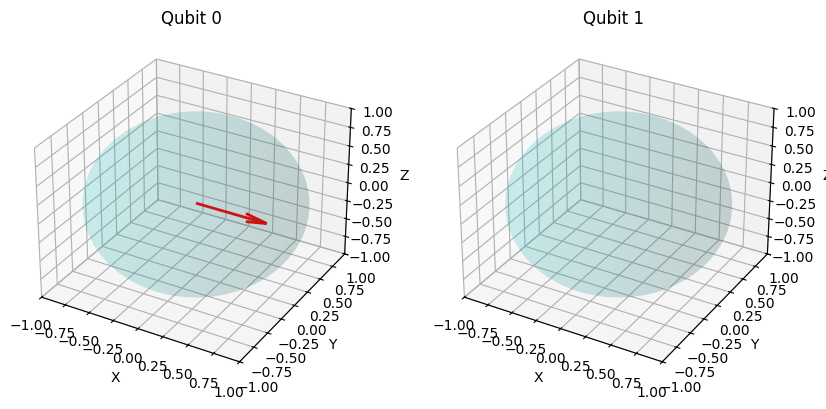

In [16]:
plot_bloch_sphere(state)

In [ ]:
save_button = Button(description="Save Figure")

filename_box = Text(
    value = title,
    description ="Filename"
)

def save_figure(b):
    global last_fig
    global title
    if last_fig is not None:
        fname = filename_box.value
        if not fname:
            fname = title + '.png'
        folder = "saved.figures"
        os.makedirs(folder, exist_ok=True)
        path = os.path.join(folder,fname)

        last_fig.savefig(path, dpi=300, bbox_inches = "tight")
        print(f"Figure saved as {path}.")
        
save_button.on_click(save_figure)

noise_dropdown = Dropdown(
    options = ["Depolarising", "Dephasing", "Bit flip"],
    description = "Noise type"
)    


In [ ]:

out = Output()


def run_gates(gate_string):
    global state
    commands = gate_string.split(";")
    for cmd in commands:
        cmd = cmd.strip()
        if not cmd:
            continue

        if "(" not in cmd or not cmd.endswith(")"):
            print(f"Invalid format: {cmd}")
            continue

        name, args = cmd[:-1].split("(", 1)
        name = name.strip()
        args = args.strip()

        try:
            if "," in args:
                qubits = list(map(int, args.split(",")))
            else:
                qubits = int(args)
        except:
            print(f"Invalid qubit input: {cmd}")
            continue

        state = apply_gate(state, name, qubits)
        print(f"Applied {name} on qubit {qubits}.")


text_in = Text(description="Gates(qubits) separated by ;:")
send_btn = Button(description="Apply gates")
measure_btn = Button(description="Measure")
get_state_btn = Button(description="Get State")
apply_noise = Button(description="Apply noise")


def on_send(_):
    out.clear_output()
    with out:    
        run_gates(text_in.value)

def on_noise(_):
    out.clear_output()

def on_measure(_):
    out.clear_output()
    with out:
        result = measure(state)
        plot_bloch_sphere(state)

def on_get_state(_):
    out.clear_output()
    with out:
        result = get_state(state)
        plot_bloch_sphere(state)

send_btn.on_click(on_send)
measure_btn.on_click(on_measure)
get_state_btn.on_click(on_get_state)


ui = VBox([
    HBox([text_in, send_btn]),
    HBox([noise_dropdown, apply_noise]),
    HBox([measure_btn, get_state_btn]),
    HBox([filename_box,save_button]),
    out
])

display(ui)